### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


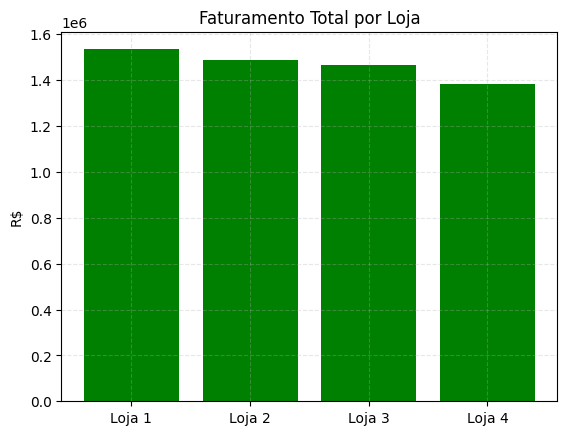

In [2]:
# Análise de Dados - Desafio Alura Store
# Autor: Dragos Calin
# Objetivo: Identificar qual loja da rede Alura Store tem o pior desempenho para ser vendida.

import matplotlib.pyplot as plt

# Função para calcular métricas por loja
def faturamento(df):
    return df["Preço"].sum()

faturamentos = {
    'Loja 1': faturamento(loja),
    'Loja 2': faturamento(loja2),
    'Loja 3': faturamento(loja3),
    'Loja 4': faturamento(loja4),
}

plt.bar(faturamentos.keys(), faturamentos.values(), color='green')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 2. Vendas por Categoria


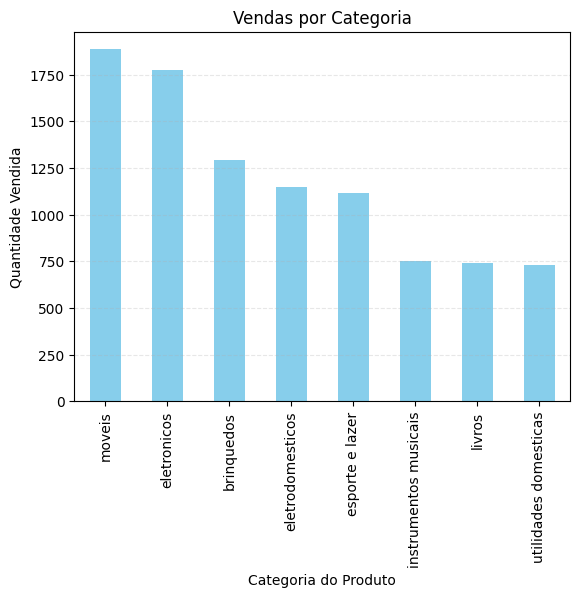

In [3]:
# Categoria mais vendida por loja
todas = pd.concat([loja, loja2, loja3, loja4])
categoria_vendas = todas['Categoria do Produto'].value_counts()

categoria_vendas.plot(kind='bar', color='skyblue')
plt.title('Vendas por Categoria')
plt.ylabel('Quantidade Vendida')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 3. Média de Avaliação das Lojas

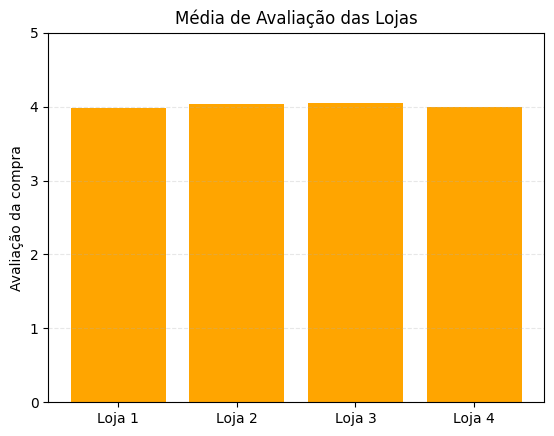

In [4]:
# Avaliação média
avaliacoes = {
    'Loja 1': round(loja['Avaliação da compra'].mean(), 2),
    'Loja 2': round(loja2['Avaliação da compra'].mean(), 2),
    'Loja 3': round(loja3['Avaliação da compra'].mean(), 2),
    'Loja 4': round(loja4['Avaliação da compra'].mean(), 2),
}

plt.bar(avaliacoes.keys(), avaliacoes.values(), color='orange')
plt.title('Média de Avaliação das Lojas')
plt.ylabel('Avaliação da compra')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produto_mais_vendido = todas['Produto'].value_counts().idxmax()
produto_menos_vendido = todas['Produto'].value_counts().idxmin()

print("Produto mais vendido:", produto_mais_vendido)
print("Produto menos vendido:", produto_menos_vendido)

Produto mais vendido: Cômoda
Produto menos vendido: Celular ABXY


# 5. Frete Médio por Loja

1.   List item
2.   List item




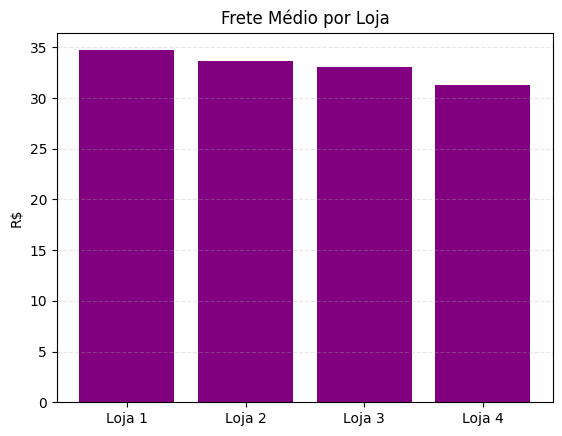

In [ ]:
fretes = {
    'Loja 1': round(loja['Frete'].mean(), 2),
    'Loja 2': round(loja2['Frete'].mean(), 2),
    'Loja 3': round(loja3['Frete'].mean(), 2),
    'Loja 4': round(loja4['Frete'].mean(), 2),
}

plt.bar(fretes.keys(), fretes.values(), color='purple')
plt.title('Frete Médio por Loja')
plt.ylabel('R$')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 6. Resultado


In [6]:
# 6. Resultado

from sklearn.preprocessing import MinMaxScaler

# Função para calcular as métricas relevantes
def calcular_metricas(df):
    return {
        'Faturamento': round(df['Preço'].sum(), 2),
        'Avaliação Média': round(df['Avaliação da compra'].mean(), 2),
        'Frete Médio': round(df['Frete'].mean(), 2),
        'Diversidade Produtos': df['Produto'].nunique()
    }

# Aplicar função em cada loja
metricas = []
for nome, df in zip(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], [loja, loja2, loja3, loja4]):
    m = calcular_metricas(df)
    m['Loja'] = nome
    metricas.append(m)

# Criar DataFrame com os resultados
df_metricas = pd.DataFrame(metricas).set_index('Loja')

# Normalizar os dados (para pontuação de 0 a 1)
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_metricas), columns=df_metricas.columns, index=df_metricas.index)

# Inverter a métrica de Frete Médio (menor é melhor)
df_norm['Frete Médio'] = 1 - df_norm['Frete Médio']

# Calcular pontuação final como média das métricas normalizadas
df_norm['Pontuação Final'] = df_norm.mean(axis=1)

# Juntar dados reais com pontuação final
df_resultado = df_metricas.copy()
df_resultado['Pontuação Final'] = df_norm['Pontuação Final']

# Ordenar da melhor para a pior
df_resultado = df_resultado.sort_values(by='Pontuação Final', ascending=False)

# Exibir resultado final
display(df_resultado)

# Recomendação final
loja_vender = df_resultado.tail(1).index[0]
print(f"🏁 Recomendação Final: Vender a {loja_vender}, que teve o pior desempenho considerando todas as métricas.")

,Faturamento,Avaliação Média,Frete Médio,Diversidade Produtos,Pontuação Final
Loja,,,,,
Loja 3,1464025.03,4.05,33.07,51,0.501304
Loja 2,1488459.06,4.04,33.62,51,0.465987
Loja 4,1384497.58,4.00,31.28,51,0.321429
Loja 1,1534509.12,3.98,34.69,51,0.250000


🏁 Recomendação Final: Vender a Loja 1, que teve o pior desempenho considerando todas as métricas.
